In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
import keras

In [2]:
# read dataset
dataset = pd.read_csv('../dataset/iris/iris.data', names=['SepalLength', 'SepalWidth', 'PetalLength',  'PetalWidth', 'class'])

In [3]:
# print some examples
dataset[::20]

,SepalLength,SepalWidth,PetalLength,PetalWidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
20,5.4,3.4,1.7,0.2,Iris-setosa
40,5.0,3.5,1.3,0.3,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor
80,5.5,2.4,3.8,1.1,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica
120,6.9,3.2,5.7,2.3,Iris-virginica
140,6.7,3.1,5.6,2.4,Iris-virginica


In [4]:
print('Dataset classes:')
print(dataset['class'].unique())

Dataset classes:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


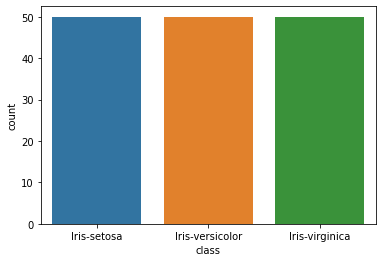

In [5]:
barplot_data = dataset.groupby('class', as_index=False).count()[['class', 'SepalLength']]
barplot_data.columns = ['class', 'count']
sns.barplot(data=barplot_data, x='class', y='count')
plt.show()

In [6]:
# data describtion
dataset.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# some informations about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


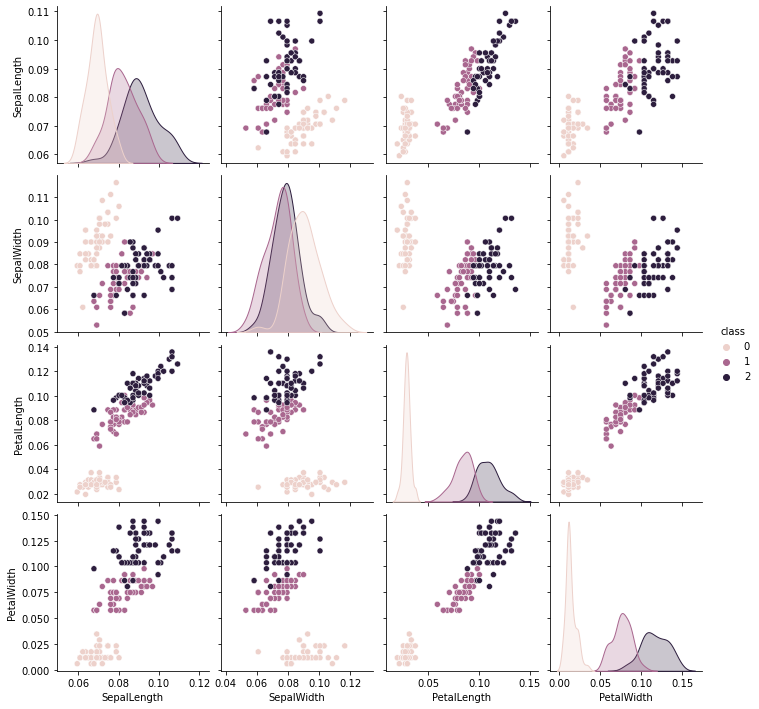

In [69]:
sns.pairplot(dataset, hue='class')
plt.show()

In [9]:
np.random.seed(0)
# one-hot encoding of classes
dataset.loc[dataset['class'] == 'Iris-setosa','class'] = 0
dataset.loc[dataset['class'] == 'Iris-versicolor','class'] = 1
dataset.loc[dataset['class'] == 'Iris-virginica','class'] = 2

# print some examples
dataset[::20]

,SepalLength,SepalWidth,PetalLength,PetalWidth,class
0,5.1,3.5,1.4,0.2,0
20,5.4,3.4,1.7,0.2,0
40,5.0,3.5,1.3,0.3,0
60,5.0,2.0,3.5,1.0,1
80,5.5,2.4,3.8,1.1,1
100,6.3,3.3,6.0,2.5,2
120,6.9,3.2,5.7,2.3,2
140,6.7,3.1,5.6,2.4,2


In [10]:
# Converting data to numpy array in order for processing
X = dataset.iloc[:, 0:4]
y = dataset.iloc[:, 4]

# print X and y shapes
print("Shape of X",X.shape)
print("Shape of y",y.shape)

Shape of X (150, 4)
Shape of y (150,)


In [11]:
# print examples
print('Examples of X:')
print(X[:3])

print('Examples of X:')
print(y[:3])

Examples of X:
   SepalLength  SepalWidth  PetalLength  PetalWidth
0          5.1         3.5          1.4         0.2
1          4.9         3.0          1.4         0.2
2          4.7         3.2          1.3         0.2
Examples of X:
0    0
1    0
2    0
Name: class, dtype: object


In [40]:
# Normalize the input
dataset_normalized = pd.DataFrame(normalize(dataset.iloc[:,0:4], axis=0))
dataset_normalized.columns = dataset.columns[:4]
dataset_normalized['class'] = dataset['class']
print('Examples of X_normalised:')
dataset_normalized[::30]

Examples of X_normalised:


,SepalLength,SepalWidth,PetalLength,PetalWidth,class
0,0.070563,0.092651,0.027546,0.011503,0
30,0.066412,0.082062,0.031482,0.011503,0
60,0.069179,0.052943,0.068866,0.057515,1
90,0.076097,0.068826,0.086575,0.069018,1
120,0.095467,0.084709,0.112153,0.132284,2


In [50]:
# Creating trainset, testset and validation data
total_length = len(dataset_normalized)
train, test = train_test_split(dataset_normalized, test_size=0.2)

X_train = train.iloc[:,0:4]
X_test = test.iloc[:,0:4]
y_train = train.iloc[:,4]
y_test = test.iloc[:,4]

# print tainset and testset shape
print("Length of train set x:", X_train.shape, "y:", y_train.shape)
print("Length of test set x:", X_test.shape, "y:", y_test.shape)

Length of train set x: (120, 4) y: (120,)
Length of test set x: (30, 4) y: (30,)


In [51]:
# Neural network module
from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout 
from keras.utils import np_utils
import tensorflow as tf
# tf.keras.layers.BatchNormalization


In [52]:
# Change the label to one hot vector

# [0]--->[1 0 0]
# [1]--->[0 1 0]
# [2]--->[0 0 1]

y_train = np_utils.to_categorical(y_train, num_classes=3)
y_test = np_utils.to_categorical(y_test, num_classes=3)

# print tainset and testset shape
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

Shape of y_train (120, 3)
Shape of y_test (30, 3)


In [54]:
model = Sequential()
model.add(Dense(1000, input_dim=4, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1000)              5000      
                                                                 
 dense_5 (Dense)             (None, 500)               500500    
                                                                 
 dense_6 (Dense)             (None, 300)               150300    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_7 (Dense)             (None, 3)                 903       
                                                                 
Total params: 656,703
Trainable params: 656,703
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.fit(X_train, y_train, batch_size=20, epochs=10, verbose=True)

Epoch 1/10
6/6 [==============================] - 0s 5ms/step - loss: 1.0825 - accuracy: 0.4083
Epoch 2/10
6/6 [==============================] - 0s 5ms/step - loss: 1.0004 - accuracy: 0.6167
Epoch 3/10
6/6 [==============================] - 0s 6ms/step - loss: 0.8478 - accuracy: 0.6583
Epoch 4/10
6/6 [==============================] - 0s 6ms/step - loss: 0.6490 - accuracy: 0.6833
Epoch 5/10
6/6 [==============================] - 0s 5ms/step - loss: 0.4539 - accuracy: 0.8417
Epoch 6/10
6/6 [==============================] - 0s 7ms/step - loss: 0.3054 - accuracy: 0.9583
Epoch 7/10
6/6 [==============================] - 0s 6ms/step - loss: 0.2126 - accuracy: 0.9750
Epoch 8/10
6/6 [==============================] - 0s 5ms/step - loss: 0.1626 - accuracy: 0.9583
Epoch 9/10
6/6 [==============================] - 0s 6ms/step - loss: 0.1202 - accuracy: 0.9667
Epoch 10/10
6/6 [==============================] - 0s 6ms/step - loss: 0.1229 - accuracy: 0.9667


In [57]:
prediction = model.predict(X_test)
length = len(prediction)
y_label = np.argmax(y_test, axis=1)
predict_label = np.argmax(prediction, axis=1)
accuracy = np.sum(y_label == predict_label) / length * 100 
print("Accuracy of the dataset", accuracy)

1/1 [==============================] - 0s 79ms/step
Accuracy of the dataset 93.33333333333333


In [64]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=,
    mode='classification'
)

In [66]:
dataset['class'].unique()

array([0, 1, 2], dtype=object)

In [67]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[0], 
    predict_fn=model.predict
)

exp.show_in_notebook(show_table=True)

157/157 [==============================] - 0s 2ms/step


In [61]:
X_test.iloc[1]

SepalLength    0.087166
SepalWidth     0.074121
PetalLength    0.100348
PetalWidth     0.086272
Name: 133, dtype: float64